In [1]:
from fredapi import Fred
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
from scipy import stats

In [2]:
fred = Fred(api_key = '75bc7bde0bed5711cc22e67e7f54ed79')

In [3]:
indicators_name = ["CPI INDEX", "UNEMPLOYMENT RATE", "REAL GDP", "POTENTIAL REAL GDP", "FED FUND EFFECTIVE RATE"]
indicators_code = ["CPIAUCSL", 'UNRATE', 'GDPC1', 'GDPPOT', 'FEDFUNDS']

In [4]:
def get_fredapidata(indicators_name, indicators_code):
    dict_indicator = {}
    
    for indicator_n, indicator_c in zip(indicators_name, indicators_code) :
        dict_indicator[indicator_n] = fred.get_series(series_id = indicator_c)
    
    df = pd.DataFrame.from_dict(dict_indicator)
    
    return df

In [5]:
df = get_fredapidata(indicators_name, indicators_code)
df

,CPI INDEX,UNEMPLOYMENT RATE,REAL GDP,POTENTIAL REAL GDP,FED FUND EFFECTIVE RATE
1947-01-01,21.48,NaN,2182.681,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,2176.892,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2033-10-01,NaN,NaN,NaN,27326.18,NaN
2034-01-01,NaN,NaN,NaN,27445.78,NaN
2034-04-01,NaN,NaN,NaN,27565.36,NaN
2034-07-01,NaN,NaN,NaN,27684.89,NaN


In [6]:
df["OUTPUT GAP"] = ((df["REAL GDP"] - df["POTENTIAL REAL GDP"]) / df["POTENTIAL REAL GDP"])

In [7]:
df["CPI YoY"] = df["CPI INDEX"].pct_change(periods = 12, fill_method = None)
df["REAL GDP QoQ"] = df["REAL GDP"].dropna().pct_change()
df["REAL GDP YoY"] = df["REAL GDP"].dropna().pct_change(periods = 4, fill_method = None)
df["POTENTIAL REAL GDP QoQ"] = df["POTENTIAL REAL GDP"].dropna().pct_change()
df["POTENTIAL REAL GDP YoY"] = df["POTENTIAL REAL GDP"].dropna().pct_change(periods = 4, fill_method = None)

In [8]:
df

,CPI INDEX,UNEMPLOYMENT RATE,REAL GDP,POTENTIAL REAL GDP,FED FUND EFFECTIVE RATE,OUTPUT GAP,CPI YoY,REAL GDP QoQ,REAL GDP YoY,POTENTIAL REAL GDP QoQ,POTENTIAL REAL GDP YoY
1947-01-01,21.48,NaN,2182.681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-01,21.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-01,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-01,22.00,NaN,2176.892,NaN,NaN,NaN,NaN,-0.002652,NaN,NaN,NaN
1947-05-01,21.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2033-10-01,NaN,NaN,NaN,27326.18,NaN,NaN,NaN,NaN,NaN,0.004392,0.017810
2034-01-01,NaN,NaN,NaN,27445.78,NaN,NaN,NaN,NaN,NaN,0.004377,0.017729
2034-04-01,NaN,NaN,NaN,27565.36,NaN,NaN,NaN,NaN,NaN,0.004357,0.017652
2034-07-01,NaN,NaN,NaN,27684.89,NaN,NaN,NaN,NaN,NaN,0.004336,0.017576


In [9]:
rate_codes = ["DGS1MO", "DGS3MO", "DGS6MO", "DGS1", "DGS2", "DGS5", "DGS7", "DGS10", "DGS20", "DGS30"]
rate_names = ["US_1M", "US_3M", "US_6M", "US_1Y", "US_2Y", "US_5Y", "US_7Y", "US_10Y", "US_20Y", "US_30Y"]
df_rates = get_fredapidata(rate_names, rate_codes)

In [10]:
df_rates

,US_1M,US_3M,US_6M,US_1Y,US_2Y,US_5Y,US_7Y,US_10Y,US_20Y,US_30Y
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.91,NaN,4.03,4.08,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-07-12,5.47,5.43,5.23,4.87,4.45,4.10,4.13,4.18,4.50,4.39
2024-07-15,5.48,5.43,5.23,4.85,4.44,4.13,4.16,4.23,4.56,4.46
2024-07-16,5.48,5.43,5.23,4.85,4.43,4.09,4.11,4.17,4.48,4.38
2024-07-17,5.47,5.43,5.23,4.85,4.42,4.07,4.09,4.16,4.46,4.37


## Statistics

### Single OLS Regression

In [11]:
y = df_rates["US_1M"].dropna().to_frame()
x = df["UNEMPLOYMENT RATE"].dropna().to_frame()
y_x = pd.concat([x, y], join='inner', axis=1)
y = y_x["US_1M"]
x = y_x["UNEMPLOYMENT RATE"]

<Axes: >

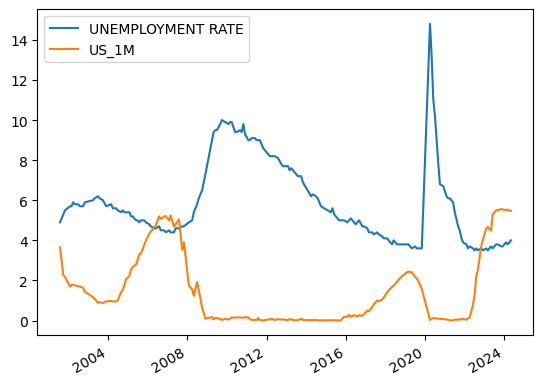

In [12]:
y_x.plot()

In [13]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [14]:
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  US_1M   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     77.69
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.14e-15
Time:                        21:59:19   Log-Likelihood:                -321.21
No. Observations:                 178   AIC:                             646.4
Df Residuals:                     176   BIC:                             652.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2323      0.329     12.854      0.000       3.582       4.882
UNEMPLOYMENT RATE    -0.4635      0.053     -8.814      0.000      -0.567      -0.360
==============================================================================
Omnibus:                       13.175   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.366
Skew:                           0.673   Prob(JB):                     0.000759
Kurtosis:                       2.645   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

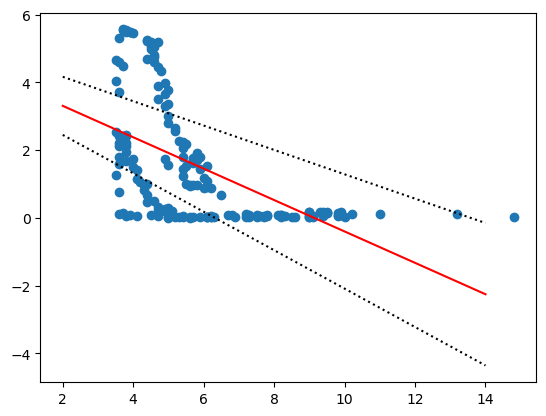

In [15]:
fix = plt.figure()
ax = plt.axes()
x = np.linspace(2, 14, 5)
ax.plot(x, model.params[0]+model.params[1]*x, color='red', linestyle='-') # OLS Equation 
ax.plot(x, (model.conf_int()).iloc[0][0]+(model.conf_int()).iloc[1][0]*x, color='black', linestyle=':') # Lower CI Equation
ax.plot(x, (model.conf_int()).iloc[0][1]+(model.conf_int()).iloc[1][1]*x, color='black', linestyle=':') # Higher CI Equation
plt.scatter(y_x["UNEMPLOYMENT RATE"], y_x["US_1M"])

In [16]:
def get_one_var_regression(y, x, standardize = True):
    
    y = y[y.index.isin(x.index)]
    x = x[x.index.isin(y.index)]
    
    if standardize == True :
        
        y = (y-y.mean())/y.std()
        x = (x-x.mean())/x.std()
    
    df_regression = pd.DataFrame()
    df_regression_bis = pd.DataFrame()
    
    x = sm.add_constant(x)
    
    model = sm.OLS(y, x).fit()
    predictions = model.predict(x)
    
    ### Beta Values ###
    dict_betas = {"Beta":[model.params[0], model.params[1]]}
    df_regression["P-Value"] = pd.DataFrame([model.pvalues[x.columns[0]], model.pvalues[x.columns[1]]])
    interp = []
    
    for value in df_regression["P-Value"]:
        if value <= 0.05:
            interp.append("Yes")
        else :
            interp.append("No")
            
    df_regression["Is Beta value significant ?"] = pd.DataFrame(interp)
    df_regression.insert(0, "Beta", pd.DataFrame(dict_betas))
    df_regression.index = ["Errors", x.columns[1]] 
    
    ### R Squared ###
    df_regression_bis["R-Squared"] = pd.DataFrame([model.rsquared, np.nan, np.nan])
    
    ### Sum of Errors ###
    df_regression_bis["Sum of Residuals"] = pd.DataFrame([model.bse[0] + model.bse[1], np.nan, "Sum is different from 0"])
    
    ### Omnibus Test ###
    omnibus_test = stats.normaltest(model.resid, axis=0)
    omnibus_test_values = [omnibus_test[0], omnibus_test[1]]
    
    if  omnibus_test[1] <= 0.05:
        omnibus_test_values.append("Errors are normally distributed")
    else :
        omnibus_test_values.append("Errors are not normally distributed")
        
    df_regression_bis["Omnibus Test"] = pd.DataFrame(omnibus_test_values)
    
    ### Jarque Bera Test ###
    jarque_bera_test_values = list(sm.stats.stattools.jarque_bera(model.resid, axis=0))
    
    if jarque_bera_test_values[1] <= 0.05:
        jarque_bera_test_values.insert(2, "Values are normally distributed")
    else :
        jarque_bera_test_values.insert(2, "Values are not normally distributed")
        
    df_regression_bis["Jarque Bera Test"] = pd.DataFrame(jarque_bera_test_values)
    
    ### Durbin Watson Statistic ###
    durbin_test = [sm.stats.stattools.durbin_watson(model.resid, axis=0), np.nan]
    if sm.stats.stattools.durbin_watson(model.resid, axis=0) <= 1:
        durbin_test.append("Strong positive autocorrelation")
    if 1 < sm.stats.stattools.durbin_watson(model.resid, axis=0) <= 1.5 :
        durbin_test.append("Moderate positive autocorrelation")
    if 1.5 < sm.stats.stattools.durbin_watson(model.resid, axis=0) <= 2.5 :
        durbin_test.append("Limited autocorrelation")
    if 2.5 < sm.stats.stattools.durbin_watson(model.resid, axis=0) <= 3 :
        durbin_test.append("Moderate negative autocorrelation")
    if 3 < sm.stats.stattools.durbin_watson(model.resid, axis=0) <= 4 :
        durbin_test.append("Strong negative autocorrelation")

    
    df_regression_bis["Durbin Watson Statistic"] = pd.DataFrame(durbin_test)
    df_regression_bis.index = ["Value", "P-Value", "Interpretation"]

    

    return df_regression, df_regression_bis.T

In [17]:
get_one_var_regression(df_rates["US_1M"].dropna().to_frame(), df["UNEMPLOYMENT RATE"].dropna().to_frame())[0]

,Beta,P-Value,Is Beta value significant ?
Errors,6.591949e-17,1.000000e+00,No
UNEMPLOYMENT RATE,-5.533828e-01,1.140266e-15,Yes


In [18]:
get_one_var_regression(df_rates["US_1M"].dropna().to_frame(), df["UNEMPLOYMENT RATE"].dropna().to_frame())[1]

,Value,P-Value,Interpretation
R-Squared,0.306232,NaN,NaN
Sum of Residuals,0.125392,NaN,Sum is different from 0
Omnibus Test,13.175318,0.001377,Errors are normally distributed
Jarque Bera Test,14.365915,0.000759,Values are normally distributed
Durbin Watson Statistic,0.089034,NaN,Strong positive autocorrelation


In [19]:
y_reg = df_rates["US_1M"].dropna().to_frame()
x_reg = pd.concat([df["UNEMPLOYMENT RATE"].dropna().to_frame(), df["CPI YoY"].dropna().to_frame(), df["FED FUND EFFECTIVE RATE"].dropna().to_frame(), df["OUTPUT GAP"].dropna().to_frame()], join='outer')

In [20]:
def get_y_vs_diffx(y, x, standardize = True):
    
    beta_dict = {}
    ols_metrics_dict = {}
    
    for column in x_reg:
        beta_dict[column] = get_one_var_regression(y_reg, x_reg[column].dropna().to_frame())[0]
        ols_metrics_dict[column] = get_one_var_regression(y_reg, x_reg[column].dropna().to_frame())[1]
        
    df_betas = pd.concat(beta_dict.values(), keys=beta_dict.keys(), axis=0)
    df_diff_metrics = pd.concat(ols_metrics_dict.values(), keys=ols_metrics_dict.keys(), axis=0)
    
    return df_betas, df_diff_metrics

In [21]:
# Y is US 1 Month Bond

get_y_vs_diffx(y_reg, x_reg, standardize = True)[0]

Beta        P-Value  \
UNEMPLOYMENT RATE       Errors                   6.591949e-17   1.000000e+00   
                        UNEMPLOYMENT RATE       -5.533828e-01   1.140266e-15   
CPI YoY                 Errors                   6.591949e-17   1.000000e+00   
                        CPI YoY                  2.851568e-01   1.142835e-04   
FED FUND EFFECTIVE RATE Errors                   6.591949e-17   1.000000e+00   
                        FED FUND EFFECTIVE RATE  9.942252e-01  1.502021e-172   
OUTPUT GAP              Errors                  -1.630640e-16   1.000000e+00   
                        OUTPUT GAP               5.473553e-01   5.672907e-05   

                                                Is Beta value significant ?  
UNEMPLOYMENT RATE       Errors                                           No  
                        UNEMPLOYMENT RATE                               Yes  
CPI YoY                 Errors                                           No  
                        CPI YoY                                         Yes  
FED FUND EFFECTIVE RATE Errors                                           No  
                        FED FUND EFFECTIVE RATE                         Yes  
OUTPUT GAP              Errors                                           No  
                        OUTPUT GAP                                      Yes

In [22]:
# Y is US 1 Month Bond

get_y_vs_diffx(y_reg, x_reg, standardize = True)[1]

Value   P-Value  \
UNEMPLOYMENT RATE       R-Squared                   0.306232       NaN   
                        Sum of Residuals            0.125392       NaN   
                        Omnibus Test               13.175318  0.001377   
                        Jarque Bera Test           14.365915  0.000759   
                        Durbin Watson Statistic     0.089034       NaN   
CPI YoY                 R-Squared                   0.081314       NaN   
                        Sum of Residuals            0.144293       NaN   
                        Omnibus Test               20.866038  0.000029   
                        Jarque Bera Test           25.449665  0.000003   
                        Durbin Watson Statistic     0.046615       NaN   
FED FUND EFFECTIVE RATE R-Squared                   0.988484       NaN   
                        Sum of Residuals            0.016155       NaN   
                        Omnibus Test              128.497151       0.0   
                        Jarque Bera Test         1343.802041       0.0   
                        Durbin Watson Statistic     0.967282       NaN   
OUTPUT GAP              R-Squared                   0.299598       NaN   
                        Sum of Residuals            0.245496       NaN   
                        Omnibus Test                1.879302  0.390764   
                        Jarque Bera Test             1.81299  0.403938   
                        Durbin Watson Statistic      0.46789       NaN   

                                                                      Interpretation  
UNEMPLOYMENT RATE       R-Squared                                                NaN  
                        Sum of Residuals                     Sum is different from 0  
                        Omnibus Test                 Errors are normally distributed  
                        Jarque Bera Test             Values are normally distributed  
                        Durbin Watson Statistic      Strong positive autocorrelation  
CPI YoY                 R-Squared                                                NaN  
                        Sum of Residuals                     Sum is different from 0  
                        Omnibus Test                 Errors are normally distributed  
                        Jarque Bera Test             Values are normally distributed  
                        Durbin Watson Statistic      Strong positive autocorrelation  
FED FUND EFFECTIVE RATE R-Squared                                                NaN  
                        Sum of Residuals                     Sum is different from 0  
                        Omnibus Test                 Errors are normally distributed  
                        Jarque Bera Test             Values are normally distributed  
                        Durbin Watson Statistic      Strong positive autocorrelation  
OUTPUT GAP              R-Squared                                                NaN  
                        Sum of Residuals                     Sum is different from 0  
                        Omnibus Test             Errors are not normally distributed  
                        Jarque Bera Test         Values are not normally distributed  
                        Durbin Watson Statistic      Strong positive autocorrelation

In [23]:
def get_multiy_vs_multix(y_reg_multi, x, standardize = True):
    
    y_beta_dict = {}
    y_param_dict = {}
    
    for colu in y_reg_multi:
        y_ind = y_reg_multi[colu].dropna().to_frame()
        y_beta_dict[colu] = get_y_vs_diffx(y_ind, x_reg, standardize = True)[0]
        y_param_dict[colu] = get_y_vs_diffx(y_ind, x_reg, standardize = True)[1]
        
    df_diff_params = pd.concat(y_param_dict, keys=y_param_dict.keys(), axis=0)
    df_diff_betas = pd.concat(y_beta_dict, keys=y_beta_dict.keys(), axis=0)
    
    return df_diff_betas, df_diff_params

In [24]:
get_multiy_vs_multix(pd.concat([y_reg, df_rates["US_6M"].dropna().to_frame(), df_rates["US_1Y"].dropna().to_frame(), df_rates["US_10Y"].dropna().to_frame()], join='outer'), pd.concat([df["UNEMPLOYMENT RATE"].dropna().to_frame(), df["CPI YoY"].dropna().to_frame(), df["FED FUND EFFECTIVE RATE"].dropna().to_frame(), df["OUTPUT GAP"].dropna().to_frame()], join='outer'), standardize = True)[0]

Beta  \
US_1M  UNEMPLOYMENT RATE       Errors                   6.591949e-17   
                               UNEMPLOYMENT RATE       -5.533828e-01   
       CPI YoY                 Errors                   6.591949e-17   
                               CPI YoY                  2.851568e-01   
       FED FUND EFFECTIVE RATE Errors                   6.591949e-17   
                               FED FUND EFFECTIVE RATE  9.942252e-01   
       OUTPUT GAP              Errors                  -1.630640e-16   
                               OUTPUT GAP               5.473553e-01   
US_6M  UNEMPLOYMENT RATE       Errors                   6.591949e-17   
                               UNEMPLOYMENT RATE       -5.533828e-01   
       CPI YoY                 Errors                   6.591949e-17   
                               CPI YoY                  2.851568e-01   
       FED FUND EFFECTIVE RATE Errors                   6.591949e-17   
                               FED FUND EFFECTIVE RATE  9.942252e-01   
       OUTPUT GAP              Errors                  -1.630640e-16   
                               OUTPUT GAP               5.473553e-01   
US_1Y  UNEMPLOYMENT RATE       Errors                   6.591949e-17   
                               UNEMPLOYMENT RATE       -5.533828e-01   
       CPI YoY                 Errors                   6.591949e-17   
                               CPI YoY                  2.851568e-01   
       FED FUND EFFECTIVE RATE Errors                   6.591949e-17   
                               FED FUND EFFECTIVE RATE  9.942252e-01   
       OUTPUT GAP              Errors                  -1.630640e-16   
                               OUTPUT GAP               5.473553e-01   
US_10Y UNEMPLOYMENT RATE       Errors                   6.591949e-17   
                               UNEMPLOYMENT RATE       -5.533828e-01   
       CPI YoY                 Errors                   6.591949e-17   
                               CPI YoY                  2.851568e-01   
       FED FUND EFFECTIVE RATE Errors                   6.591949e-17   
                               FED FUND EFFECTIVE RATE  9.942252e-01   
       OUTPUT GAP              Errors                  -1.630640e-16   
                               OUTPUT GAP               5.473553e-01   

                                                              P-Value  \
US_1M  UNEMPLOYMENT RATE       Errors                    1.000000e+00   
                               UNEMPLOYMENT RATE         1.140266e-15   
       CPI YoY                 Errors                    1.000000e+00   
                               CPI YoY                   1.142835e-04   
       FED FUND EFFECTIVE RATE Errors                    1.000000e+00   
                               FED FUND EFFECTIVE RATE  1.502021e-172   
       OUTPUT GAP              Errors                    1.000000e+00   
                               OUTPUT GAP                5.672907e-05   
US_6M  UNEMPLOYMENT RATE       Errors                    1.000000e+00   
                               UNEMPLOYMENT RATE         1.140266e-15   
       CPI YoY                 Errors                    1.000000e+00   
                               CPI YoY                   1.142835e-04   
       FED FUND EFFECTIVE RATE Errors                    1.000000e+00   
                               FED FUND EFFECTIVE RATE  1.502021e-172   
       OUTPUT GAP              Errors                    1.000000e+00   
                               OUTPUT GAP                5.672907e-05   
US_1Y  UNEMPLOYMENT RATE       Errors                    1.000000e+00   
                               UNEMPLOYMENT RATE         1.140266e-15   
       CPI YoY                 Errors                    1.000000e+00   
                               CPI YoY                   1.142835e-04   
       FED FUND EFFECTIVE RATE Errors                    1.000000e+00   
                               FED FUND EFFECTIVE RATE  1.502021e-172   
       O

In [25]:
get_multiy_vs_multix(pd.concat([y_reg, df_rates["US_6M"].dropna().to_frame(), df_rates["US_1Y"].dropna().to_frame(), df_rates["US_10Y"].dropna().to_frame()], join='outer'), pd.concat([df["UNEMPLOYMENT RATE"].dropna().to_frame(), df["CPI YoY"].dropna().to_frame(), df["FED FUND EFFECTIVE RATE"].dropna().to_frame(), df["OUTPUT GAP"].dropna().to_frame()], join='outer'), standardize = True)[1]

Value   P-Value  \
US_1M  UNEMPLOYMENT RATE R-Squared                 0.306232       NaN   
                         Sum of Residuals          0.125392       NaN   
                         Omnibus Test             13.175318  0.001377   
                         Jarque Bera Test         14.365915  0.000759   
                         Durbin Watson Statistic   0.089034       NaN   
...                                                     ...       ...   
US_10Y OUTPUT GAP        R-Squared                 0.299598       NaN   
                         Sum of Residuals          0.245496       NaN   
                         Omnibus Test              1.879302  0.390764   
                         Jarque Bera Test           1.81299  0.403938   
                         Durbin Watson Statistic    0.46789       NaN   

                                                                       Interpretation  
US_1M  UNEMPLOYMENT RATE R-Squared                                                NaN  
                         Sum of Residuals                     Sum is different from 0  
                         Omnibus Test                 Errors are normally distributed  
                         Jarque Bera Test             Values are normally distributed  
                         Durbin Watson Statistic      Strong positive autocorrelation  
...                                                                               ...  
US_10Y OUTPUT GAP        R-Squared                                                NaN  
                         Sum of Residuals                     Sum is different from 0  
                         Omnibus Test             Errors are not normally distributed  
                         Jarque Bera Test         Values are not normally distributed  
                         Durbin Watson Statistic      Strong positive autocorrelation  

[80 rows x 3 columns]